# ECON5350 - Machine Learning Classification

* Instructor: David Guo
* Spring, 2024


<!-- # Installing Latest PyCaret

* https://github.com/pycaret/pycaret -->

## Agenda
1) Quick review on term group project, find your group partner. Jumpstart on the projects.
2) Start a new section on *Classification*; binary result (Yes/No) vs regression (on continuous DV variable), 

# This section will be helpful for your term project. 

# Imports packages

In [2]:
!pip install missingno -q

In [16]:
# importing the required libraries
import pandas as pd
import numpy as np
import pickle, os, sys
# Visualisation libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import missingno as ms

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

import sklearn
# import pycaret #used for model selection

import tqdm 

In [4]:
# # check version
# from pycaret.utils import version
# version()

# Import Data

In [3]:
# Reading a .csv file by creating a dataframe using pandas
# Reading the datasets
df = pd.read_csv('Traffic Violaions.csv', encoding = "utf-8", on_bad_lines='skip')

In [4]:
print(df.shape)
df.head()

(52966, 15)


,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [5]:
.55/.6*100

91.66666666666667

# Data Preprocessing & EDA

In [6]:
df.isnull().sum()

stop_date                 0
stop_time                 1
country_name          52966
driver_gender          3386
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50881
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64

In [7]:
df1 = df.copy(deep=True) #deep=True is default change to df1 has no impact on df
df1.drop(columns = ['country_name','search_type','driver_age_raw'], inplace=True)
df1.dropna(subset = ['driver_gender'], inplace = True)

In [11]:
df.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,nan_missing,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,nan_missing,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,nan_missing,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,nan_missing,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,nan_missing,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [10]:
df.country_name = [str(i)+"_missing" for i in df.country_name]

In [5]:
# df1 = df.copy(deep=True)
# df1.driver_gender.value_counts(dropna=False)

In [8]:
#df1.isna().sum()
df1.isnull().sum() #leave the missing age there

stop_date               0
stop_time               0
driver_gender           0
driver_age            240
driver_race             0
violation_raw           0
violation               0
search_conducted        0
stop_outcome            0
is_arrested             0
stop_duration           0
drugs_related_stop      0
dtype: int64

In [12]:
df1.shape

(49580, 12)

In [15]:
pickle.dump(df1, open('tmp.pkl', 'wb'))

In [17]:
df1 = pickle.load(open('tmp.pkl', 'rb'))

* 1. Some missing values are to remain in the driver_age column. We have to fill these missing values using median, OR you can try KNN we used in regression modeling **
* 2. After cleaning, we again have to check the remaining missing values.**

# Data Manipulation:

In [19]:
data = df1.copy(deep=True)
pd.to_datetime(data['stop_time'])
data['stop_hour'] = pd.to_datetime(data['stop_time'], format = '%H:%M').dt.hour

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49580 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49580 non-null  object 
 1   stop_time           49580 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age          49340 non-null  float64
 4   driver_race         49580 non-null  object 
 5   violation_raw       49580 non-null  object 
 6   violation           49580 non-null  object 
 7   search_conducted    49580 non-null  object 
 8   stop_outcome        49580 non-null  object 
 9   is_arrested         49580 non-null  object 
 10  stop_duration       49580 non-null  object 
 11  drugs_related_stop  49580 non-null  object 
 12  stop_hour           49580 non-null  int32  
dtypes: float64(1), int32(1), object(11)
memory usage: 5.1+ MB


In [26]:
int("1:55".split(":")[0])

'1'

In [23]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour
0,1/2/2005,1:55,M,20.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,1
1,1/18/2005,8:15,M,40.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,8
2,1/23/2005,23:15,M,33.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,23
3,2/20/2005,17:15,M,19.0,White,Call for Service,Other,False,Arrest Driver,True,16-30 Min,False,17
4,3/14/2005,10:00,F,21.0,White,Speeding,Speeding,False,Citation,False,0-15 Min,False,10


In [27]:
data.stop_hour[:5]

0     1
1     8
2    23
3    17
4    10
Name: stop_hour, dtype: int32

In [28]:
data['stop_duration'].value_counts()

stop_duration
0-15 Min     37432
16-30 Min     9845
30+ Min       2303
Name: count, dtype: int64

## You do not need to build a 1-hot matrix of stop_duration

In [29]:
data['stop_duration'] = data['stop_duration'].map({'0-15 Min':7.5,'16-30 Min':23,'30+ Min':45})

In [30]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 49580 entries, 0 to 52964
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           49580 non-null  object 
 1   stop_time           49580 non-null  object 
 2   driver_gender       49580 non-null  object 
 3   driver_age          49340 non-null  float64
 4   driver_race         49580 non-null  object 
 5   violation_raw       49580 non-null  object 
 6   violation           49580 non-null  object 
 7   search_conducted    49580 non-null  object 
 8   stop_outcome        49580 non-null  object 
 9   is_arrested         49580 non-null  object 
 10  stop_duration       49580 non-null  float64
 11  drugs_related_stop  49580 non-null  object 
 12  stop_hour           49580 non-null  int32  
dtypes: float64(2), int32(1), object(10)
memory usage: 5.1+ MB


In [31]:
stop_duration_based_on_race = data.groupby('driver_race')[['stop_duration']].mean()
stop_duration_based_on_race

,stop_duration
driver_race,
Asian,11.384000
Black,13.817865
Hispanic,14.295682
Other,10.708054
White,11.879359


In [32]:
data.search_conducted = data.search_conducted.replace(to_replace=[True, False], value=[1, 0])

In [33]:
data.search_conducted.value_counts()

search_conducted
0    47495
1     2085
Name: count, dtype: int64

In [34]:
data.drugs_related_stop = data.drugs_related_stop.replace(to_replace=[True, False], value=[1, 0])

In [38]:
data['stop_date'].dtype

dtype('<M8[ns]')

In [37]:

data['stop_date'] = pd.to_datetime(data['stop_date'])
data['stop_Year'] = pd.DatetimeIndex(data['stop_date']).year

In [39]:
yearly_data = data.groupby('stop_Year').size()

In [40]:
yearly_data.head()

stop_Year
2005     2505
2006    10141
2007     8905
2008     8151
2009     7237
dtype: int64

In [41]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,False,7.5,0,1,2005
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,False,7.5,0,8,2005
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,False,7.5,0,23,2005
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,23.0,0,17,2005
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,False,7.5,0,10,2005


In [42]:
search_conducted = len(data[data.search_conducted == 1])
arrested_after_search = len(data[(data.search_conducted == 1) & (data.is_arrested is True)])
arrested = ((arrested_after_search/search_conducted)*100)
not_arrested = (100-(arrested))

In [43]:
not_arrested

100.0

In [44]:
data.groupby(['violation_raw', 'is_arrested']).size()

violation_raw                     is_arrested
APB                               False             26
                                  True              17
Call for Service                  False            519
                                  True             154
Equipment/Inspection Violation    False           3914
                                  True             362
Motorist Assist/Courtesy          False            111
                                  True               8
Other Traffic Violation           False           7829
                                  True             556
Registration Violation            False           1572
                                  True             248
Special Detail/Directed Patrol    False           1944
                                  True              10
Speeding                          False          31649
                                  True             489
Suspicious Person                 False             19
                   

In [46]:
data.violation.value_counts()

violation
Speeding               32138
Moving violation        8385
Equipment               4276
Other                   2961
Registration/plates     1820
Name: count, dtype: int64

* Age Distribution *

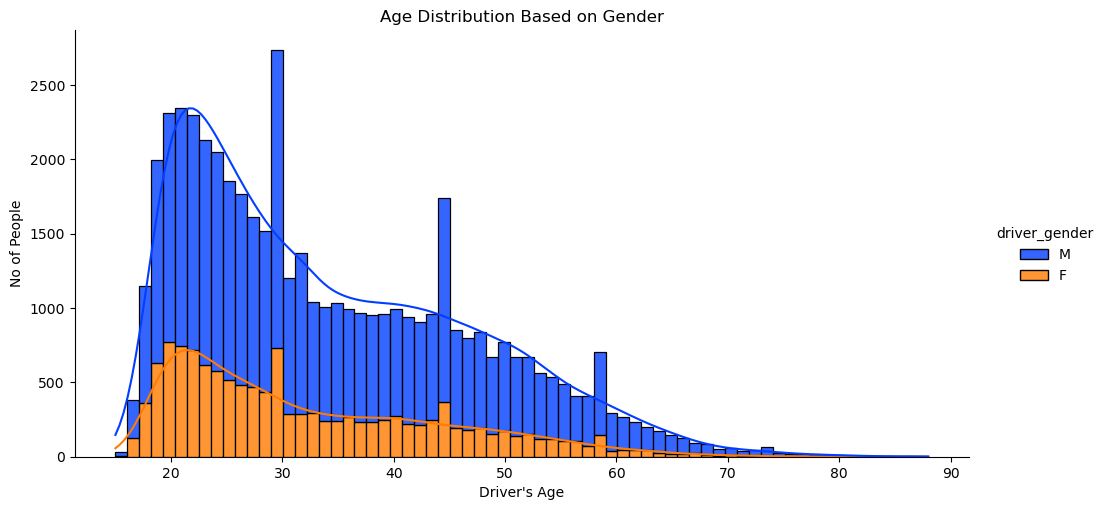

In [16]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = data, 
            multiple = 'stack', alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age Distribution Based on Gender')
plt.xlabel("Driver's Age")
plt.ylabel("No of People");

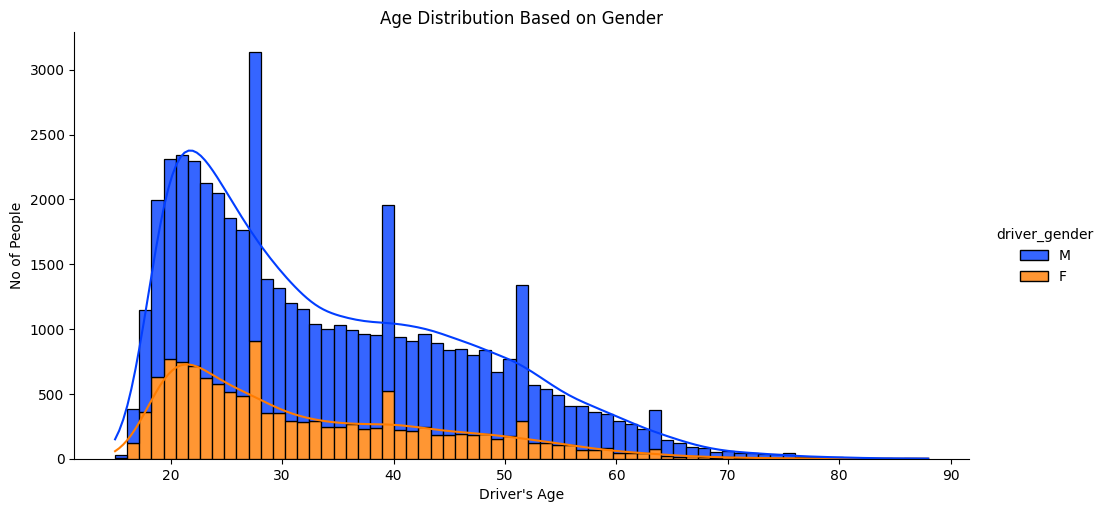

In [45]:
sns.displot(x = 'driver_age', hue = 'driver_gender', kde = True, data = data, 
            multiple = 'stack', alpha = 0.8, palette = "bright", height=5, aspect=2)
plt.title('Age Distribution Based on Gender')
plt.xlabel("Driver's Age")
plt.ylabel("No of People");

* Distribution in Violation Type *

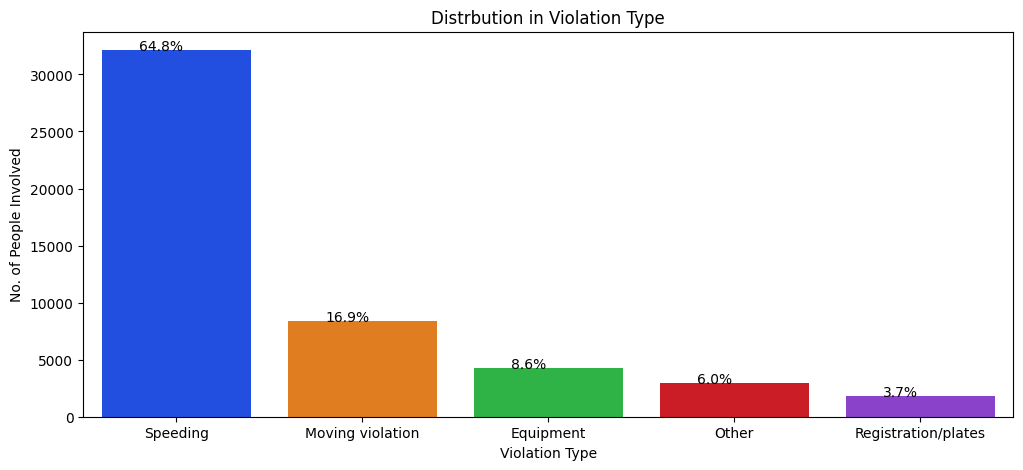

In [47]:
fig , ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(x = data.violation, data = data, order = data.violation.value_counts().index, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.violation))
    x = i.get_x()+i.get_width()-0.6
    y = i.get_height()
    ax.annotate(percentage, (x, y), )
plt.title("Distrbution in Violation Type")
plt.xlabel("Violation Type")
plt.ylabel("No. of People Involved");

**Hours in Which Speed Violated**

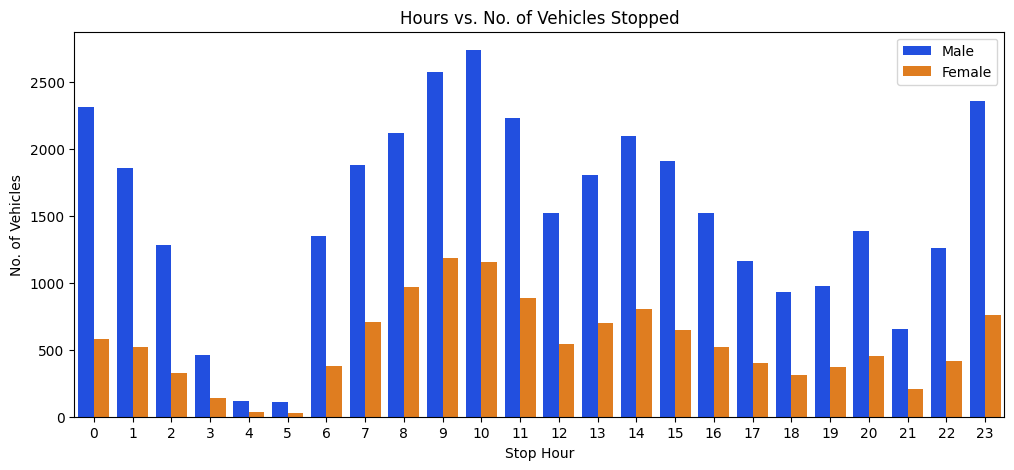

In [48]:
plt.figure(figsize = (12,5))
sns.countplot(x = data.stop_hour,data = data,hue = 'driver_gender', palette = "bright")
plt.title('Hours vs. No. of Vehicles Stopped')
plt.legend(['Male','Female'])
plt.xlabel("Stop Hour")
plt.ylabel("No. of Vehicles");

**Traffic Violation Distribution Based on Race**


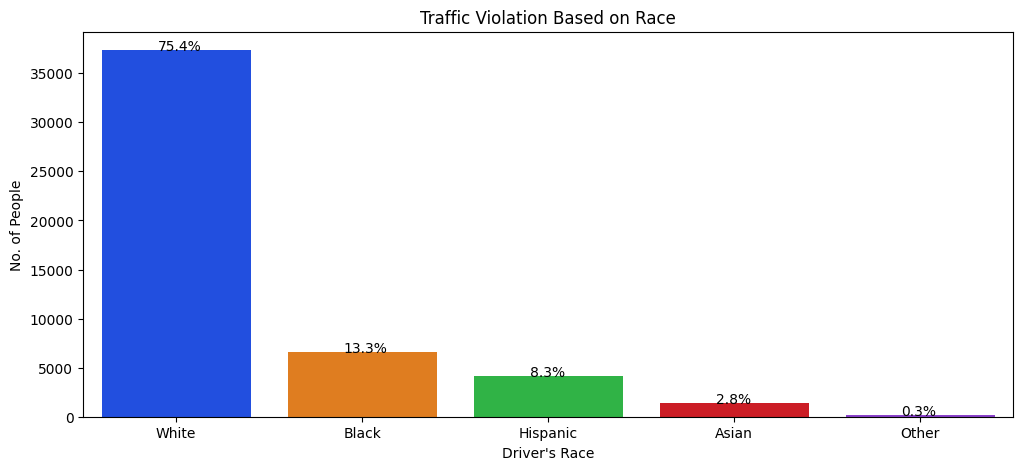

In [49]:
fig , ax = plt.subplots(figsize = (12,5))
ax = sns.countplot(x=data.driver_race, data=data, order = data.driver_race.value_counts().index,
                   linewidth = 0, palette = "bright")
for i in ax.patches:
    percentage = '{:.1f}%'.format(100*i.get_height()/len(data.driver_race))
    x = i.get_x() + i.get_width() - 0.5
    y = i.get_height()
    ax.annotate(percentage, (x, y))
plt.title('Traffic Violation Based on Race')
plt.xlabel("Driver's Race")
plt.ylabel("No. of People");

# Fit Logistics Regression

In [51]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [52]:
data['stop_time'].dtype

dtype('O')

In [50]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1:55,M,20.0,White,Speeding,Speeding,0,Citation,False,7.5,0,1,2005
1,2005-01-18,8:15,M,40.0,White,Speeding,Speeding,0,Citation,False,7.5,0,8,2005
2,2005-01-23,23:15,M,33.0,White,Speeding,Speeding,0,Citation,False,7.5,0,23,2005
3,2005-02-20,17:15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,23.0,0,17,2005
4,2005-03-14,10:00,F,21.0,White,Speeding,Speeding,0,Citation,False,7.5,0,10,2005


In [53]:
data['stop_time'] = [float(i.replace(":", ".")) for i in data['stop_time']]

In [54]:
data['stop_time'][:5].dtype

dtype('float64')

In [55]:
data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation_raw,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,2005-01-02,1.55,M,20.0,White,Speeding,Speeding,0,Citation,False,7.5,0,1,2005
1,2005-01-18,8.15,M,40.0,White,Speeding,Speeding,0,Citation,False,7.5,0,8,2005
2,2005-01-23,23.15,M,33.0,White,Speeding,Speeding,0,Citation,False,7.5,0,23,2005
3,2005-02-20,17.15,M,19.0,White,Call for Service,Other,0,Arrest Driver,True,23.0,0,17,2005
4,2005-03-14,10.00,F,21.0,White,Speeding,Speeding,0,Citation,False,7.5,0,10,2005


In [56]:
data = data.drop(['violation_raw', 'stop_outcome', 'stop_date'], axis = 1)

In [57]:
data.head()

,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,is_arrested,stop_duration,drugs_related_stop,stop_hour,stop_Year
0,1.55,M,20.0,White,Speeding,0,False,7.5,0,1,2005
1,8.15,M,40.0,White,Speeding,0,False,7.5,0,8,2005
2,23.15,M,33.0,White,Speeding,0,False,7.5,0,23,2005
3,17.15,M,19.0,White,Other,0,True,23.0,0,17,2005
4,10.00,F,21.0,White,Speeding,0,False,7.5,0,10,2005


## one-hot transformation on 'driver_gender', 'driver_race', 'violation'

In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)

cat_col = ['driver_gender','driver_race','violation']

data_cat_1hot = cat_encoder.fit_transform(data[['driver_gender','driver_race','violation']])
data_cat_1hot

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [28]:
data_cat_1hot.shape

(49580, 12)

In [29]:
cat_encoder.categories_

[array(['F', 'M'], dtype=object),
 array(['Asian', 'Black', 'Hispanic', 'Other', 'White'], dtype=object),
 array(['Equipment', 'Moving violation', 'Other', 'Registration/plates',
        'Speeding'], dtype=object)]

In [30]:
list(cat_encoder.categories_[0])

['F', 'M']

In [33]:
data_cat_1hot_col = ["gender_" + i for i in list(cat_encoder.categories_[0])] \
                    + ["Race" + i for i in list(cat_encoder.categories_[1])] \
                    + ["Violation_" + i for i in list(cat_encoder.categories_[2])]
data_cat_1hot_col

['gender_F',
 'gender_M',
 'RaceAsian',
 'RaceBlack',
 'RaceHispanic',
 'RaceOther',
 'RaceWhite',
 'Violation_Equipment',
 'Violation_Moving violation',
 'Violation_Other',
 'Violation_Registration/plates',
 'Violation_Speeding']

In [34]:
assert len(data_cat_1hot_col) == len(set(data_cat_1hot_col)), "There are duplicated column names"

In [35]:
data_1hot = pd.merge(data.loc[:, [i for i in data.columns if i not in cat_col]], 
                     pd.DataFrame(data_cat_1hot, columns = data_cat_1hot_col), 
                     left_index = True, right_index = True)

In [36]:
data_1hot.shape

(46438, 20)

In [198]:
X = data_1hot.drop('is_arrested', axis = 1)
y = np.where(data_1hot.is_arrested, 1, 0)

# Scaled data is necessary for ML model

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler

In [69]:
num_pipeline = Pipeline([
        #('imputer', SimpleImputer(strategy="median")),       
        ('std_scaler', StandardScaler())
        ])

In [87]:
X_col = X.columns
X = pd.DataFrame(num_pipeline.fit_transform(X))

In [88]:
X.columns = X_col

In [89]:
X.head()

,stop_time,driver_age,search_conducted,stop_duration,drugs_related_stop,stop_hour,stop_Year,gender_F,gender_M,RaceAsian,RaceBlack,RaceHispanic,RaceOther,RaceWhite,Violation_Equipment,Violation_Moving violation,Violation_Other,Violation_Registration/plates,Violation_Speeding
0,-1.584461,-1.110031,-0.210312,-0.508506,-0.089619,-1.626969,-1.701028,-0.597730,0.597730,-0.168427,-0.390413,-0.298491,-0.05499,0.569144,-0.307598,-0.450273,-0.251666,-0.194337,0.735352
1,-0.573979,0.463870,-0.210312,-0.508506,-0.089619,-0.554064,-1.701028,-0.597730,0.597730,-0.168427,-0.390413,-0.298491,-0.05499,0.569144,-0.307598,-0.450273,-0.251666,-0.194337,0.735352
2,1.722573,-0.086995,-0.210312,-0.508506,-0.089619,1.745017,-1.701028,-0.597730,0.597730,-0.168427,-0.390413,-0.298491,-0.05499,0.569144,-0.307598,-0.450273,-0.251666,-0.194337,0.735352
3,0.803952,-1.188726,-0.210312,1.133831,-0.089619,0.825385,-1.701028,-0.597730,0.597730,-0.168427,-0.390413,-0.298491,-0.05499,0.569144,-0.307598,-0.450273,3.973520,-0.194337,-1.359892
4,-0.290737,-1.031336,-0.210312,-0.508506,-0.089619,-0.247520,-1.701028,1.672997,-1.672997,-0.168427,-0.390413,-0.298491,-0.05499,0.569144,-0.307598,-0.450273,-0.251666,-0.194337,0.735352


In [37]:
#data_1hot['stop_time'] = [float(i.replace(":", ".")) for i in data_1hot.stop_time]

# Splite data for training and testing

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [91]:
lr_pred = logreg.predict(X_test)

In [92]:
from sklearn import metrics

In [93]:
lr_cm = metrics.confusion_matrix(y_test, lr_pred)
lr_cm

array([[8894,   65],
       [ 264,   65]])

In [94]:
pd.Series(y_test).value_counts()

0    8959
1     329
dtype: int64

<AxesSubplot:>

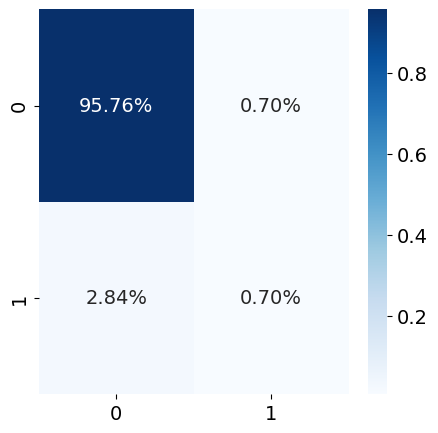

In [95]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(lr_cm/np.sum(lr_cm), annot=True, fmt='.2%', cmap='Blues')

In [96]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import precision_recall_curve

In [97]:
def perfMatrix(obs, pred):
    print('Precision: %.3f' % precision_score(obs, pred))
    print('Recall: %.3f' % recall_score(obs, pred))    
    print('F1_score: %.3f' % f1_score(obs, pred))    

In [98]:
perfMatrix(y_test, lr_pred)

Precision: 0.500
Recall: 0.198
F1_score: 0.283


# Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [100]:
#sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, 
#  criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', 
# max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, 
# oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)[source]¶

In [165]:
pos_wt =sum(y_train == 0) /sum(y_train == 1)

In [117]:
#create calss weight dict
class_weight={0: 1, 1: pos_wt}

In [123]:
%%time

#clf = RandomForestClassifier(max_depth=6, random_state=0, class_weight = "balanced", n_estimators=1000)
rf_clf = RandomForestClassifier(max_depth=6, random_state=0, class_weight = class_weight, n_estimators=1000)

rf_clf.fit(X_train, y_train)

CPU times: user 15.9 s, sys: 3.63 ms, total: 15.9 s
Wall time: 15.9 s


RandomForestClassifier(class_weight={0: 1, 1: 25.180408738548273}, max_depth=6,
                       n_estimators=1000, random_state=0)

In [124]:
rf_pred = rf_clf.predict(X_test)

In [125]:
rf_cm = metrics.confusion_matrix(y_test, rf_pred)
rf_cm

array([[7193, 1766],
       [  54,  275]])

<AxesSubplot:>

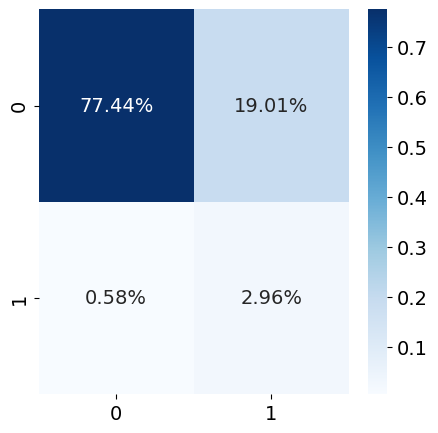

In [126]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(rf_cm/np.sum(rf_cm), annot=True, fmt='.2%', cmap='Blues')

In [127]:
perfMatrix(y_test, rf_pred)

Precision: 0.135
Recall: 0.836
F1_score: 0.232


# CatBoost

In [129]:
!pip install catboost

  Using cached catboost-1.1.1-cp39-none-manylinux1_x86_64.whl (76.6 MB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)


In [229]:
import catboost as cb
from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

In [237]:
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
cb_class_weights = dict(zip(classes, weights))

In [132]:
class_weights

{0: 0.5198567070610954, 1: 13.090204369274137}

In [133]:
cb_clf = CatBoostClassifier(loss_function= "Logloss", class_weights=cb_class_weights, silent = True)
cb_clf.fit(X_train, y_train)

In [134]:
cb_pred = cb_clf.predict(X_test)

In [135]:
cb_cm = metrics.confusion_matrix(y_test, cb_pred)
cb_cm

array([[8068,  891],
       [  97,  232]])

<AxesSubplot:>

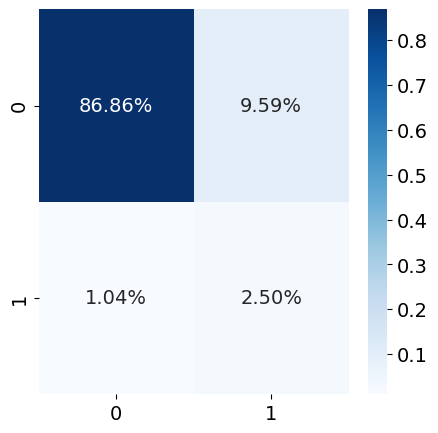

In [136]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cb_cm/np.sum(cb_cm), annot=True, fmt='.2%', cmap='Blues')

In [265]:
perfMatrix(y_test, cb_pred)

Precision: 0.207
Recall: 0.705
F1_score: 0.320


# fine-tune hyper-parameters by OPTUNA (randomized search)
* https://optuna.org/

In [222]:
!pip install optuna

  Using cached optuna-3.0.3-py3-none-any.whl (348 kB)
  Using cached cliff-4.1.0-py3-none-any.whl (81 kB)
  Using cached colorlog-6.7.0-py2.py3-none-any.whl (11 kB)
  Using cached cmaes-0.9.0-py3-none-any.whl (23 kB)
  Using cached alembic-1.8.1-py3-none-any.whl (209 kB)
  Using cached Mako-1.2.4-py3-none-any.whl (78 kB)
  Using cached autopage-0.5.1-py3-none-any.whl (29 kB)
  Using cached prettytable-3.5.0-py3-none-any.whl (26 kB)
  Using cached cmd2-2.4.2-py3-none-any.whl (147 kB)
  Using cached stevedore-4.1.1-py3-none-any.whl (50 kB)
  Using cached pyperclip-1.8.2-py3-none-any.whl
  Using cached pbr-5.11.0-py2.py3-none-any.whl (112 kB)


In [231]:
import optuna
from optuna.integration import CatBoostPruningCallback
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [242]:
cb_class_weights

{0: 0.5198567070610954, 1: 13.090204369274137}

In [273]:
def objective(trial: optuna.Trial) -> float:
    
    global cb_class_weights
    
    train_x, valid_x, train_y, valid_y = train_test_split(X_train, y_train, test_size=0.2)
    
    param = {        
        "depth": trial.suggest_int("depth", 4, 12),
        "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.1),
        'l2_leaf_reg':trial.suggest_int('l2_leaf_reg', 10, 100),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli", "MVS"]),        
        "eval_metric": "Accuracy",
        "objective": "Logloss",
        "class_weights":cb_class_weights,
        }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1, log=True)

    cbm = cb.CatBoostClassifier(**param)

    pruning_callback = CatBoostPruningCallback(trial, "Accuracy")
    cbm.fit(
        train_x,
        train_y,
        eval_set=[(valid_x, valid_y)],
        verbose=0,
        early_stopping_rounds=100,
        callbacks=[pruning_callback],        
    )

    # evoke pruning manually.
    pruning_callback.check_pruned()

    preds = cbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = f1_score(valid_y, pred_labels)

    return accuracy


In [274]:
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5), direction="maximize")
study.optimize(objective, n_trials=40, timeout=600)

print("Number of finished trials: {}".format(len(study.trials)))

print("Best trial:")
trial = study.best_trial

print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2022-11-20 23:05:40,619] A new study created in memory with name: no-name-e2e93de5-fb42-4231-be1d-ffb264a840c7
[I 2022-11-20 23:05:42,864] Trial 0 finished with value: 0.25612244897959185 and parameters: {'depth': 8, 'learning_rate': 0.0738398690325314, 'l2_leaf_reg': 61, 'boosting_type': 'Plain', 'bootstrap_type': 'MVS'}. Best is trial 0 with value: 0.25612244897959185.
[I 2022-11-20 23:05:45,742] Trial 1 finished with value: 0.2312734082397004 and parameters: {'depth': 8, 'learning_rate': 0.011895658800215762, 'l2_leaf_reg': 74, 'boosting_type': 'Plain', 'bootstrap_type': 'Bernoulli', 'subsample': 0.24026927907957057}. Best is trial 0 with value: 0.25612244897959185.
[I 2022-11-20 23:05:59,500] Trial 2 finished with value: 0.2749855574812247 and parameters: {'depth': 12, 'learning_rate': 0.07301318382627987, 'l2_leaf_reg': 82, 'boosting_type': 'Plain', 'bootstrap_type': 'Bayesian', 'bagging_temperature': 1.8775727013847987}. Best is trial 2 with value: 0.2749855574812247.
[I 2022-

Number of finished trials: 40
Best trial:
  Value: 0.3568215892053973
  Params: 
    depth: 9
    learning_rate: 0.07475527287838588
    l2_leaf_reg: 54
    boosting_type: Plain
    bootstrap_type: MVS


In [275]:
print('best_value:', study.best_value)

best_value: 0.3568215892053973


In [276]:
%%time 

cb_optuna = cb.CatBoostClassifier(**study.best_params, silent = True)
cb_optuna.fit(X_train, y_train)

In [277]:
cb_optuna_pred = cb_optuna.predict(X_test)

In [278]:
perfMatrix(y_test, cb_optuna_pred)

Precision: 0.561
Recall: 0.307
F1_score: 0.397


In [279]:
cb_cm_ = metrics.confusion_matrix(y_test, cb_optuna_pred)
cb_cm_

array([[8880,   79],
       [ 228,  101]])

<AxesSubplot:>

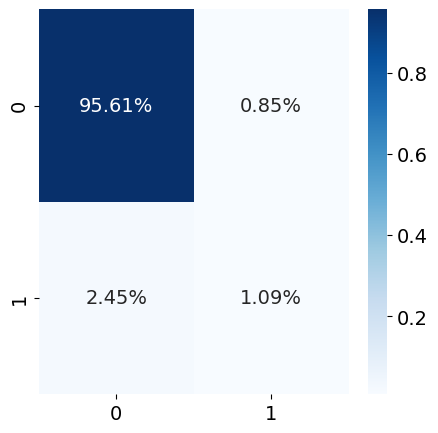

In [280]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(cb_cm_/np.sum(cb_cm_), annot=True, fmt='.2%', cmap='Blues')

# MLP 

In [217]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(random_state=1, max_iter=1000).fit(X_train, y_train)

In [218]:
mlp_pred = mlp_clf.predict(X_test)

In [219]:
perfMatrix(y_test, mlp_pred)

Precision: 0.552
Recall: 0.277
F1_score: 0.368


In [220]:
mlp_cm = metrics.confusion_matrix(y_test, mlp_pred)
mlp_cm

array([[8885,   74],
       [ 238,   91]])

# get ensembled prediction

In [287]:
cb_prob = cb_optuna.predict_proba(X_test)[:,1]
rf_prob = rf_clf.predict_proba(X_test)[:,1]
mlp_prob = mlp_clf.predict_proba(X_test)[:,1]

In [288]:
ensemble_prob = (cb_prob + rf_prob + mlp_prob)/3

In [289]:
ensemble_pred = np.where(ensemble_prob > 0.5, 1, 0) 

In [290]:
ensemble_cm = metrics.confusion_matrix(y_test, ensemble_pred)
ensemble_cm

array([[8829,  130],
       [ 198,  131]])

<AxesSubplot:>

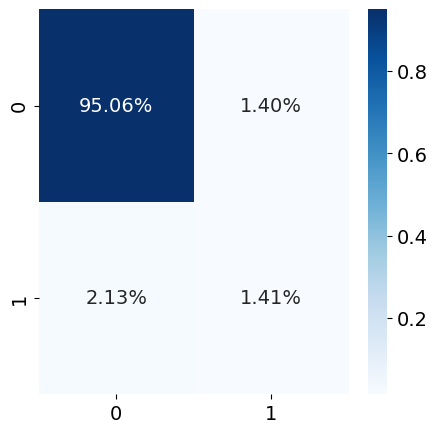

In [291]:
fig, ax = plt.subplots(figsize=(5,5))  
sns.heatmap(ensemble_cm/np.sum(ensemble_cm), annot=True, fmt='.2%', cmap='Blues')

In [292]:
perfMatrix(y_test, ensemble_pred)

Precision: 0.502
Recall: 0.398
F1_score: 0.444
